# Regresi Logistik
Regresi logistik adalah sebuah pendekatan untuk membuat model prediksi seperti halnya regresi linear atau yang biasa disebut dengan istilah Ordinary Least Squares (OLS) regression. Perbedaannya adalah pada regresi logistik, peneliti memprediksi variabel terikat yang berskala dikotomi. Skala dikotomi yang dimaksud adalah skala data nominal dengan dua kategori, misalnya: Ya dan Tidak, Baik dan Buruk atau Tinggi dan Rendah.
<br>
### Penjelasan Dataset
Dataset kali ini adalah data dari suatu Kafe X yang dimana berupa penilaian suatu menu dari pelanggan, karyawan, dan petinggi untuk diketahui apakah item tersebut dirasa perlu di-bundle atau tidak dengan makanan lain?
<br>
1 = Tidak perlu bundling/paket <br>
0 = perlu bundling/paket

## Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/hangg/Downloads/Random Aslab/DSDA/Material/Order_Bundle_WP.csv", sep=";") #Sesuaikan dengan directory file masing-masing

In [3]:
data.head(4)

,Id,Penilaian_dari_pelanggan,Penilaian_dari_karyawan,Penilaian_dari_petinggi,Perlu_dipaket?
0,1,880,3,3,1
1,2,750,1,3,1
2,3,700,1,1,1
3,4,751,1,2,1


In [4]:
data.dtypes

Id                          int64
Penilaian_dari_pelanggan    int64
Penilaian_dari_karyawan     int64
Penilaian_dari_petinggi     int64
Perlu_dipaket?              int64
dtype: object

In [5]:
data.describe()

,Id,Penilaian_dari_pelanggan,Penilaian_dari_karyawan,Penilaian_dari_petinggi,Perlu_dipaket?
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,671.400000,2.733333,2.166667,0.700000
std,8.803408,99.421291,1.229896,0.833908,0.466092
min,1.000000,504.000000,1.000000,1.000000,0.000000
25%,8.250000,595.000000,1.250000,1.250000,0.000000
50%,15.500000,691.000000,3.000000,2.000000,1.000000
75%,22.750000,745.500000,4.000000,3.000000,1.000000
max,30.000000,880.000000,4.000000,3.000000,1.000000


## Pengolahan Regresi Logistik

In [6]:
X = data[['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi']]
y = data['Perlu_dipaket?']

### Memisahkan antara data yang diuji dengan data yang dilatih
Terlihat bahwa test_size = 0.3 yang artinya data yang diuji sebanyak 30% dari total data <br> 
contoh: <br>
Total data di Order_Bundle_WP sebanyak 30 baris, maka data yang diuji adalah 30*30% = 9 data yang diuji

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

### Confusion Matrix
Terlihat bahwa hasil dari confusion matrix <br>
<b> Prediksi BENAR </b> <br>
Nilai yang sebenarnya 0 dan prediksi 0 sebanyak 1 buah <br>
Nilai yang sebenarnya 1 dan prediksi 1 sebanyak 7 buah <br>
<b> Prediksi SALAH </b> <br>
Nilai yang sebenarnya 0 dan prediksi 1 sebanyak 1 buah <br>
Nilai yang sebenarnya 1 dan prediksi 0 sebanyak 0 buah

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

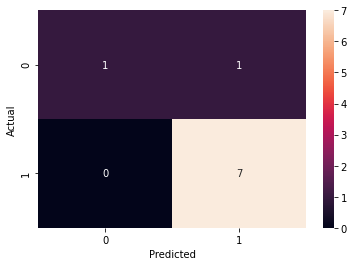

In [9]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

### Akurasi
Terlihat bahwa akurasinya adalah 0.88, cari persentase dari hasil akurasi dengan dikalikan 100% maka hasilnya adalah 88%

In [10]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8888888888888888


In [11]:
print (X_test)

    Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
2                        700                        1                        1
28                       796                        4                        2
13                       649                        4                        3
10                       632                        3                        1
26                       627                        4                        1
24                       695                        3                        3
27                       770                        4                        2
11                       800                        2                        1
17                       536                        3                        3


In [12]:
print (y_pred)

[1 1 1 1 1 1 1 1 0]


### Penjelasan hasil prediksi di atas
<br>
<b>Hasil Prediksi</b>
<table>
    <tr>
        <th>Penilaian_dari_pelanggan</th>
        <th>Penilaian_dari_karyawan</th>
        <th>Penilaian_dari_petinggi</th>
        <th>Hasil_Prediksi</th>
    </tr>
    <tr>
        <td>700</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>796</td>
        <td>4</td>
        <td>2</td>
        <td>1</td>
    </tr>
    <tr>
        <td>649</td>
        <td>4</td>
        <td>3</td>
        <td>1</td>
    </tr>
    <tr>
        <td><b>632</b></td>
        <td><b>3</b></td>
        <td><b>1</b></td>
        <td><b>1</b></td>
    </tr>
    <tr>
        <td>627</td>
        <td>4</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>695</td>
        <td>3</td>
        <td>3</td>
        <td>1</td>
    </tr>
    <tr>
        <td>770</td>
        <td>4</td>
        <td>2</td>
        <td>1</td>
    </tr>
    <tr>
        <td>800</td>
        <td>2</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>536</td>
        <td>3</td>
        <td>3</td>
        <td>0</td>
    </tr>
</table>
<br>
<br>
<b>Data Sebenarnya</b>
<table>
    <tr>
        <th>Penilaian_dari_pelanggan</th>
        <th>Penilaian_dari_karyawan</th>
        <th>Penilaian_dari_petinggi</th>
        <th>Perlu_dipaket?</th>
    </tr>
    <tr>
        <td>700</td>
        <td>1</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>796</td>
        <td>4</td>
        <td>2</td>
        <td>1</td>
    </tr>
    <tr>
        <td>649</td>
        <td>4</td>
        <td>3</td>
        <td>1</td>
    </tr>
    <tr>
        <td><b>632</b></td>
        <td><b>3</b></td>
        <td><b>1</b></td>
        <td><b>0</b></td>
    </tr>
    <tr>
        <td>627</td>
        <td>4</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>695</td>
        <td>3</td>
        <td>3</td>
        <td>1</td>
    </tr>
    <tr>
        <td>770</td>
        <td>4</td>
        <td>2</td>
        <td>1</td>
    </tr>
    <tr>
        <td>800</td>
        <td>2</td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td>536</td>
        <td>3</td>
        <td>3</td>
        <td>0</td>
    </tr>
</table>
<br>
<b>Terlihat bahwa data yang dicetak tebal pada tabel merupakan prediksi yang salah, jadi tingkat keakuratan dari prediksi ini adalah <br> Rumus: Total data yang benar/Total data = 8/9 = 0.88</b>

<b>===================================================================================================================</b>

## Prediksi dengan menambah data baru
Membuat data frame dengan menambah data yang diuji dengan value pada masing-masing kolom:<br>
Penilaian_dari_pelanggan: 500, 600 <br>
Penilaian_dari_karyawan: 2, 4 <br>
Penilaian_dari_petinggi: 1, 3 <br>

In [13]:
new_predict = {'Penilaian_dari_pelanggan': [500, 600],
               'Penilaian_dari_karyawan':[2, 4],
               'Penilaian_dari_petinggi':[1, 3]
                  }

df2 = pd.DataFrame(new_predict,columns= ['Penilaian_dari_pelanggan','Penilaian_dari_karyawan','Penilaian_dari_petinggi'])

In [14]:
y_pred=logistic_regression.predict(df2)

In [15]:
print (df2)

   Penilaian_dari_pelanggan  Penilaian_dari_karyawan  Penilaian_dari_petinggi
0                       500                        2                        1
1                       600                        4                        3


In [16]:
print (y_pred)

[0 1]


### Penjelasan dari data yang baru diuji
Hasil prediksi di atas terlihat seperti berikut 
<table>
    <tr>
        <th>Penilaian_dari_pelanggan</th>
        <th>Penilaian_dari_karyawan</th>
        <th>Penilaian_dari_petinggi</th>
        <th>Hasil_Prediksi</th>
    </tr>
    <tr>
        <td>500</td>
        <td>2</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>600</td>
        <td>4</td>
        <td>3</td>
        <td>1</td>
    </tr>
</table>
<br>
<b>Interpretasi</b><br>
Terlihat bahwa hasil prediksi di kolom Penilaian_dari_pelanggan dengan value 500 menghasilkan prediksi 0, maka menu dengan<br> Penilaian_dari_pelanggan:500 <br> Penilaian_dari_karyawan:2 <br> Penilaian_dari_petinggi:1 <br><b>perlu di-bundling/dipaketkan dengan menu lain</b>
<br>
<br>
<b>Sedangkan</b>
<br>
<br>
Kolom<br>
Penilaian_dari_pelanggan:600 <br> 
Penilaian_dari_karyawan:4 <br> 
Penilaian_dari_petinggi:3 <br>
<b>tidak perlu di-bundling/dipaketkan dengan menu lain</b>